## Exercise 1: Linear regression
### Linear regression with one variable
In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.
You would like to use this data to help you select which city to expand
to next.
The file ___ex1data1.txt___ contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [5]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Reading and plotting data
First we should visualize data for better understanding of the data. Because dataset has only two dimensions we will represent data on a scatter plot.

In [10]:
data1 = pd.read_csv("ex1data1.txt", header = None, names = ["Population", "Profit"]) # read data from file
x1 = data1.iloc[:,0] # first column
x2 = data1.iloc[:,1] # second column
m = len(x2) # number of training examples
data1.head(8) # display first 8 rows

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000


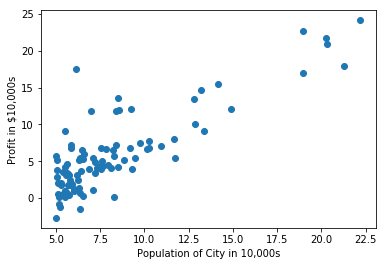

In [7]:
plt.scatter(x1, x2)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [11]:
# add aditional dimension to data for intercept term
x1 = x1[:,np.newaxis]  
x2 = x2[:,np.newaxis]
# initialize theta to 0
theta = np.zeros([2,1])
# learning rate
alpha = 0.01 
num_iter = 2*10**3
ones = np.ones((m, 1))
# add intercept term
x1 = np.hstack((ones, x1))

In [12]:
# computing cost of linear function using sum of squares
def cost(x, y, theta):
    "computes cost of linear function"
    
    m = len(y)
    g_x = np.dot(x, theta) - y # linear function
    j_theta = np.sum(np.power(g_x, 2)) / (2*m) # sum of squares
    
    return j_theta

J = cost(x1, x2, theta)
print("Cost of linear function y = 0 is ",J)       

Cost of linear function y = 0 is  32.0727338775


In [16]:
# finding optimal theta parameters with gradient descend
def grad_desc(X, y, theta, alpha, num_iter):
    '''gradient descent for optimazing theta parameters'''
    
    for _ in range(num_iter):
        g_x = X.dot(theta)
        theta = theta - alpha * (1/m) * (X.T.dot(g_x - y))
    
    return theta            

In [17]:
theta = grad_desc(x1, x2, theta, alpha, num_iter)
print("Theta = ", theta)
J = cost(x1, x2, theta)
print("Cost for optimazed theta is ", J)

Theta =  [[-3.78806857]
 [ 1.18221277]]
Cost for optimazed theta is  4.47802760988


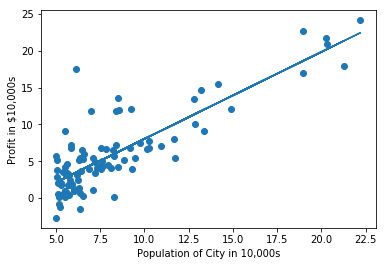

In [18]:
# plot of optimal linear function
plt.scatter(x1[:,1], x2)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(x1[:,1], x1.dot(theta)) # regression line
plt.show()


In [27]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population of 35000, we predict a profit of {:.4f}\n'.format(predict1[0]*10000))

predict2 = np.dot([1, 7], theta)
print('For population of 70000, we predict a profit of {:.4f}\n'.format(predict2[0]*10000))


For population of 35000, we predict a profit of 3496.7614

For population of 70000, we predict a profit of 44874.2085



### Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ___ex1data2.txt___ contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

#### Feature normalization
We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [28]:
data_multi = pd.read_csv('ex1data2.txt', sep = ',', header = None,
                         names = ["Size", "Num. bedrooms", "price"]) # read data from txt file
X = data_multi.iloc[:,0:2]
y = data_multi.iloc[:,2]
n = len(y) # number of training examples
data_multi.head(n = 8) # show data in table

,Size,Num. bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999


In [30]:
# apply feature normalization 
X = (X - np.mean(X)) / np.std(X)

In [31]:
# add intercept term to X
ones = np.ones((n, 1))
X = np.hstack((ones, X))

# parameters initialization
alpha = 0.01
num_iter = 1500
theta = np.zeros((3,1))
y = y[:,np.newaxis]

In [32]:
# cost function
def costMulti(X, y, theta):
    '''computes sum of squares'''
    
    n = len(y)
    h_x = np.dot(X, theta) - y
    cost = np.sum(np.power(h_x, 2)) / (2*n)
    
    return cost

In [33]:
# cost of linear function y = 0
J = costMulti(X, y, theta)
print(J)

65591548106.5


In [36]:
def gradiendDescentMulti(X, y, theta, iterations, alpha):
    '''finds optimal parameters for theta'''
    
    m = len(y)
    for _ in range(iterations):
        h_x = X.dot(theta)
        theta = theta - (alpha / m) * (X.T.dot(h_x - y)) # gradient update
    
    return theta

In [37]:
# cost of linear function with optimal theta parameters
theta = gradiendDescentMulti(X, y, theta, num_iter, alpha)
J = costMulti(X, y, theta)
print("Theta = ", theta)
print("Cost with optimal theta parameters is ", J)

Theta =  [[ 340412.56301439]
 [ 109370.05670466]
 [  -6500.61509507]]
Cost with optimal theta parameters is  2043282709.93


In [38]:
2105448288.6292474 / 2043282709.93

1.0304243648698896